In [241]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("train.csv")

In [140]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [142]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [143]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [144]:
df['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [145]:
## fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="neighbourhood_group",
##                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
## fig.update_layout(mapbox_style="open-street-map")
## fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
## fig.show()

In [146]:
### 1.2. Qual das colunas são categóricas e quais são numéricas?

In [147]:
df.loc[df['last_review'].isna(), 'last_review'] = ""
df.loc[df['reviews_per_month'].isna(), 'reviews_per_month'] = df['reviews_per_month'].mean()

In [148]:
df = df.drop(['id', 'host_id','host_id','host_name','name'], axis=1)

In [149]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [150]:
df_cidade = df.groupby(['neighbourhood_group'])['price'].mean().to_frame().reset_index().sort_values('price', ascending = False)
df_cidade

,neighbourhood_group,price
2,Manhattan,196.875814
1,Brooklyn,124.383207
4,Staten Island,114.812332
3,Queens,99.517649
0,Bronx,87.496792


In [151]:
px.bar(df_cidade,x='neighbourhood_group', y='price')

In [152]:
df_quarto = df.groupby(['room_type'])['price'].mean().to_frame().reset_index().sort_values('price', ascending = False)
df_quarto

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


In [153]:
px.bar(df_quarto,x='room_type', y='price')

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

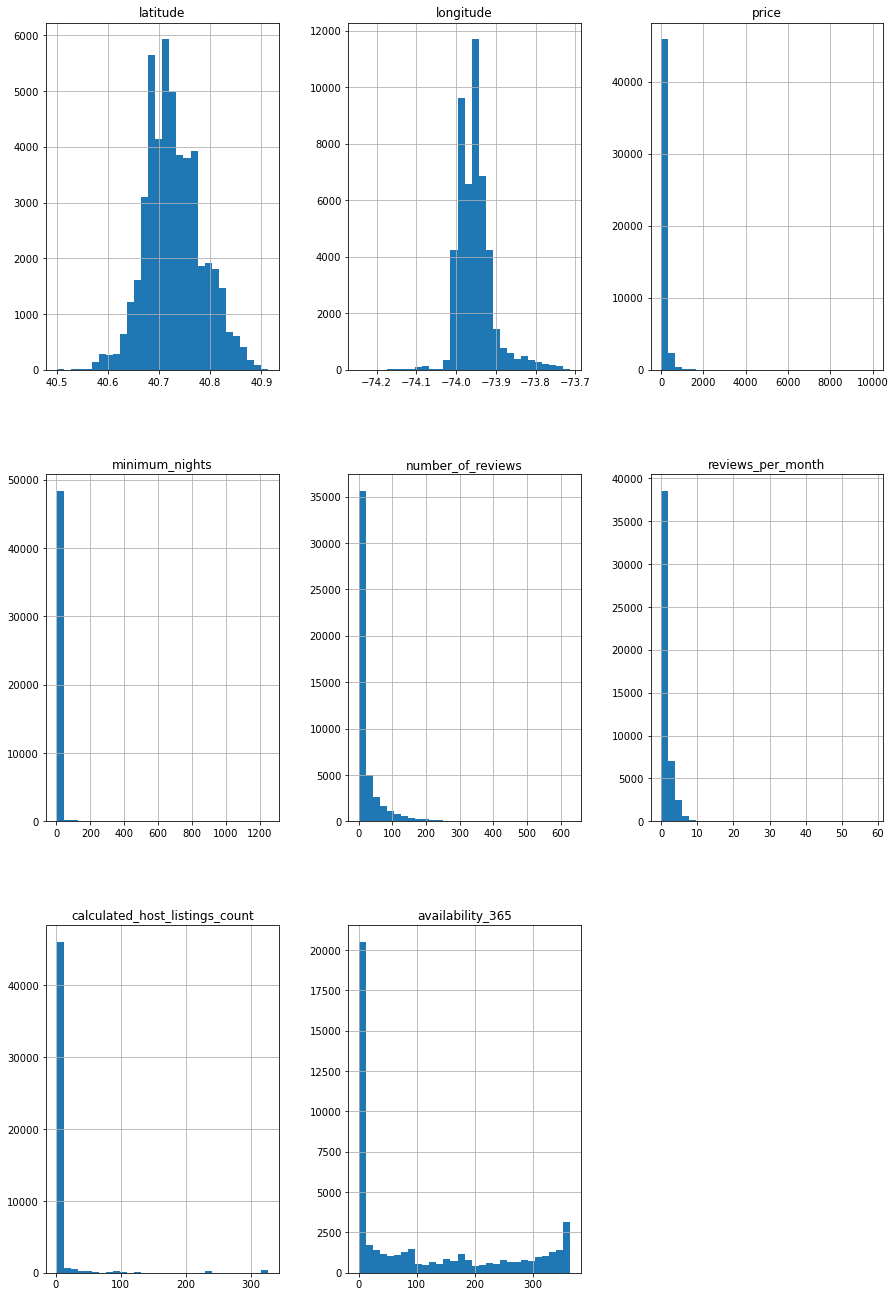

In [154]:
df.hist(bins=30, figsize=(15,23))

In [155]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [156]:
dummy_df = df[['neighbourhood_group','room_type']]

In [157]:
dummy_data = pd.get_dummies(dummy_df, columns=['neighbourhood_group','room_type'], prefix=['neighbourhood_group','room_type'
                                                                                            ])
dummy_data

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
48890,0,1,0,0,0,0,1,0
48891,0,1,0,0,0,0,1,0
48892,0,0,1,0,0,1,0,0
48893,0,0,1,0,0,0,0,1


In [158]:
df = df.drop(['neighbourhood_group','neighbourhood','last_review'], axis=1)

In [159]:
df = df.drop('room_type', axis=1)

In [160]:
df = df.join(dummy_data)


In [161]:
df.isna().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_Bronx            0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Entire home/apt            0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
y = df['price']
x = df.drop('price', axis=1)

In [164]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3)
y_test

22335     40
13443    125
22228    147
17870    199
4994      50
        ... 
25454     80
8023      40
7758      85
41406    377
6746      85
Name: price, Length: 14669, dtype: int64

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [167]:
preds = lin_reg.predict(x_test)

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
mae, mse, r2

(75.38290194643409, 52203.614454093644, 0.10045989866374616)

In [169]:
from sklearn.neural_network import MLPRegressor

In [170]:
modelo_mlp = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=1000)

In [171]:
modelo_mlp.fit(x_train, y_train)

MLPRegressor(max_iter=1000)

In [172]:
predsmlp = modelo_mlp.predict(x_test)

In [175]:
maemlp = mean_absolute_error(y_test, predsmlp)
msemlp = mean_squared_error(y_test, predsmlp)
r2mlp = r2_score(y_test, predsmlp)
maemlp,msemlp,r2mlp

(72.71794959977338, 50758.04599581433, 0.1253690320838574)

In [178]:
from sklearn.svm import SVR

In [179]:
modelo_svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
modelo_svr.fit(x_train, y_train)

SVR(kernel='linear')

In [201]:
predssvm = modelo_svr.predict(x_test)

In [202]:
maesvm = mean_absolute_error(y_test, preds)
msesvm = mean_squared_error(y_test, preds)
r2svm = r2_score(y_test, preds)
maesvm, msesvm, r2svm

(75.38290194643409, 52203.614454093644, 0.10045989866374616)

In [223]:

predssvm[2]

172.36534456971822

In [227]:
y_grafico = y_test.to_frame().reset_index()
len(y_grafico)

14669

In [235]:
y_grafico['predssvm'] = predssvm
y_grafico['predsmlp'] = predsmlp
y_grafico['predslr'] = preds
y_grafico                                                       

,index,price,predssvm,predsmlp,predslr
0,22335,40,69.376867,60.182534,90.699620
1,13443,125,171.232775,235.191871,213.728436
2,22228,147,172.365345,191.437765,207.823109
3,17870,199,154.960283,280.901308,231.024752
4,4994,50,61.410813,76.711361,65.146150
...,...,...,...,...,...
14664,25454,80,95.280761,147.829442,121.117519
14665,8023,40,52.145984,29.570060,87.123744
14666,7758,85,145.800840,158.176492,177.167159
14667,41406,377,245.454049,266.017134,258.175669


In [254]:
y_grafico = y_grafico.sort_values(by='index', ascending=True)

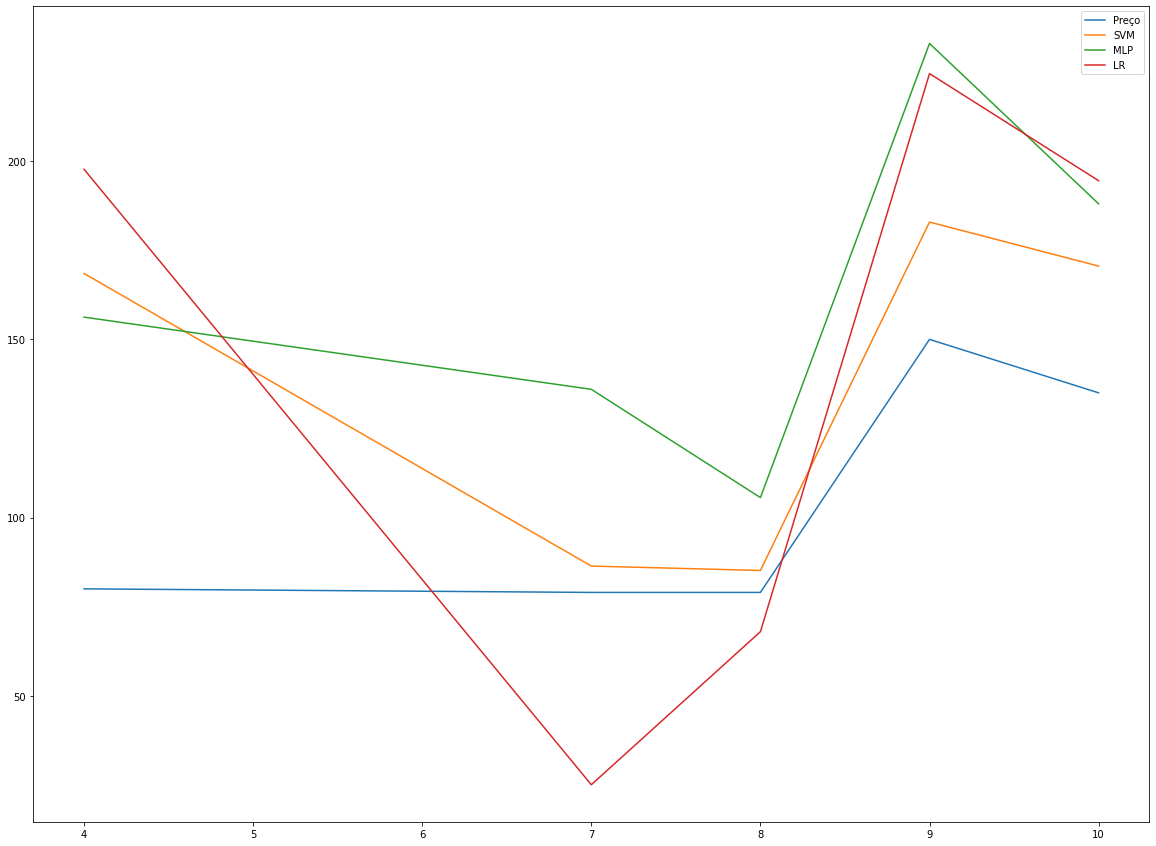

In [258]:
fig, ax = plt.subplots(figsize=(20,15))
plt.plot(y_grafico['index'][0:5], y_grafico['price'][0:5], label='Preço')
plt.plot(y_grafico['index'][0:5], y_grafico['predssvm'][0:5], label='SVM')
plt.plot(y_grafico['index'][0:5], y_grafico['predsmlp'][0:5], label='MLP')
plt.plot(y_grafico['index'][0:5], y_grafico['predslr'][0:5], label='LR')
plt.legend()